In [3]:
#  
# Extract data from json files  and with some exploratory data analysis 
#
# Author:   Shahram Mohrehkesh <smohr003@odu.edu>
# Created:  June 31  2016 

# Copyright (C) 2016  
# For license information, see LICENSE.txt
#
 
"""
Extract data from json files and some initial data exploratory 
"""

##########################################################################
## Imports
##########################################################################

from datetime import date
import json

import pandas as pd 

In [4]:
data = []
with open('yelp_academic_dataset_user.json') as f:
    for line in f:
        #print(line)
        data.append(json.loads(line))   
print(data[:1])


[{'fans': 70, 'user_id': '18kPq7GPye-YQ3LyKyAZPw', 'compliments': {'profile': 8, 'plain': 25, 'note': 20, 'photos': 14, 'hot': 48, 'writer': 9, 'funny': 11, 'more': 3, 'cute': 15, 'cool': 78}, 'name': 'Russel', 'yelping_since': '2004-10', 'friends': ['rpOyqD_893cqmDAtJLbdog', '4U9kSBLuBDU391x6bxU-YA', 'fHtTaujcyKvXglE33Z5yIw', '8J4IIYcqBlFch8T90N923A', 'wy6l_zUo7SN0qrvNRWgySw', 'HDQixQ-WZEV0LVPJlIGQeQ', 'T4kuUr_iJiywOPdyM7gTHQ', 'z_5D4XEIlGAPjG3Os9ix5A', 'i63u3SdbrLsP4FxiSKP0Zw', 'pnrGw4ciBXJ6U5QB2m0F5g', 'ytjCBxosVSqCOQ62c4KAxg', 'r5uiIxwJ-I-oHBkNY2Ha3Q', 'niWoSKswEbooJC_M7HMbGw', 'kwoxiKMyoYjB1wTCYAjYRg', '9A8OuP6XwLwnNb9ov3_Ncw', '27MmRg8LfbZXNEHkEnKSdA', 'Bn4sJUTtKFZQt0FKHF2Adw', 'uguXfIEpI65jSCH5MgUDgA', '6VZNGc2h2Bn-uyuEXgOt5g', 'AZ8CTtwr-4sGM2kZqF6qig', 'S742m-AuQicMSLDdErrLZQ', 'uGmQ6ab4iVpWn5m61VFhkQ', 'GJYJX4SujVj3BR8v2F9PDQ', '3shjifK-vZkIHciyy_KbYA', '4lc_H2Cf7CO0tCgyA3aSVQ', 'Tunkp_F1R_uFBJQTsDxD4g', 'B9pKfr27czBbCoAIircZdQ', 'pePGMO6EbDpbaZ7D2m6HIg', 'XRM8W6HUoXbrYKR3BCj9

In [5]:
print(data[0]['name'])
t = data[0]
len(data)

Russel


552339

In [6]:
uniqueUsersIDs = set()

for i in range(len(data)): 
    #if i==0: print(set(data[i]['friends']))
    uniqueUsersIDs.add(data[i]['user_id'])
    for f in data[i]['friends']: 
        uniqueUsersIDs.add(f)
print(len(uniqueUsersIDs))

552339


In [7]:
pdData = pd.DataFrame(data)

In [8]:
print(pdData.iloc[100]['review_count'])

3


In [9]:
print(sum(pdData[:]['review_count'])/len(pdData))

27.6317370311


In [10]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


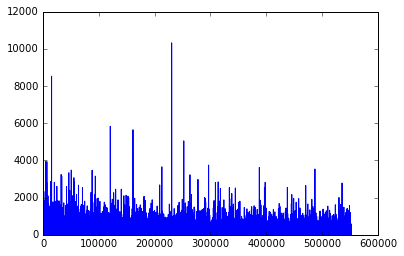

In [11]:
plt.plot(pdData[:]['review_count'])

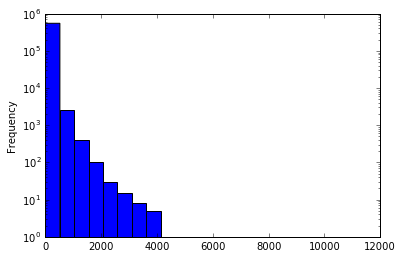

In [12]:
pdData['review_count'].plot.hist(bins=20, log =True)

In [13]:
print(pdData[pdData['review_count']> 4000][['user_id' ,'review_count']])

                       user_id  review_count
15207   1p3d__fuRRCDXfbS1Tq0wA          8529
120448  3zBKfA8-_fJRagWSTMLVvg          5833
161097  VhI6xyylcAxi0wOy2HOX3w          5648
230389  JLM36sYWmouJAZ2knzst7A         10320
252143  22-6yC05pgWbLupHZTjQig          5050


In [14]:
print(len(pdData))

552339


In [16]:
print(len(pdData.loc[12,'friends']))

17


In [17]:

friendCount = pd.Series( [ len(pdData.loc[i,'friends'])    for i in range(len(pdData))] )
friendCount.mean()

6.452227707983684

In [18]:
print(len(friendCount[friendCount!=0]))

249440


In [19]:
pdData['friends_count'] = friendCount

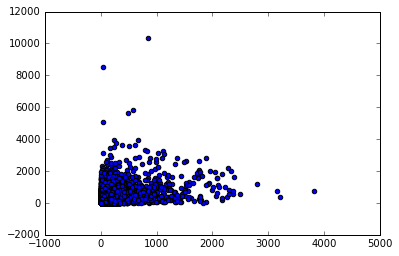

In [20]:
plt.scatter(pdData['friends_count'], pdData['review_count'])

(0, 4000)

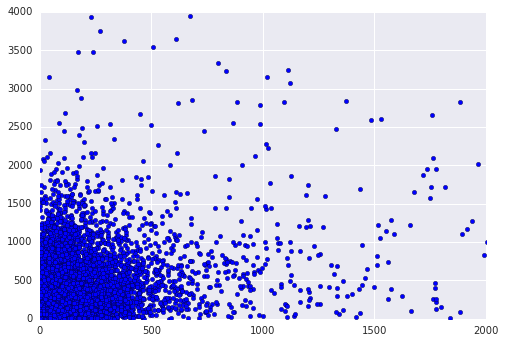

In [23]:
plt.scatter(pdData['friends_count'], pdData['review_count'])
plt.xlim(0, 2000)
plt.ylim(0, 4000)

In [22]:
import seaborn as sns

In [31]:
def getyear(yelping_since): 
    return yelping_since.split('-')[0]
    
pdData['yelping_since_year'] = pdData['yelping_since'].apply(getyear)
pdData['yelping_since_year'].describe()

count     552339
unique        13
top         2014
freq       91186
Name: yelping_since_year, dtype: object

In [41]:
apprxLabels = [] 
for i in range(2004,2016):
    apprxLabels  = apprxLabels + [' ']*5 + [str(i)] +  [' ']*5
len(apprxLabels)

132

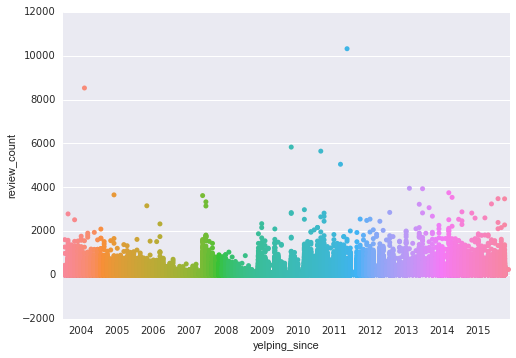

In [42]:
# avoiding the overlap of tick text 
g =sns.stripplot(pdData['yelping_since'], pdData['review_count']) 
g.set_xticklabels(rotation = 0 , labels = apprxLabels) # 

In [ ]:
g = sns.stripplot(pdData['yelping_since'], pdData['review_count']) # 

plt.ylim(0, 4000)

In [227]:
print(pdData['yelping_since'].describe())
print(pdData['yelping_since'].max())
print(pdData['yelping_since'].min())


count      552339
unique        136
top       2014-07
freq         9664
Name: yelping_since, dtype: object
2016-01
2004-10


In [242]:
pdDataYear = pdData.groupby(['yelping_since_year']).sum()
pdDataYear


,average_stars,fans,review_count,friends_count
yelping_since_year,,,,
2004,218.62,2971,12006,5984
2005,2774.12,18752,181520,34343
2006,15744.30,46147,675744,115964
2007,42667.98,89991,1431759,295565
2008,79778.77,117443,2016577,441019
2009,140996.80,122038,2374371,495065
2010,226867.93,117224,2556388,619203
2011,328116.03,97284,2332948,616670
2012,319572.89,57057,1512467,404025


In [253]:
pdDataYear['review_count']

yelping_since_year
2004      12006
2005     181520
2006     675744
2007    1431759
2008    2016577
2009    2374371
2010    2556388
2011    2332948
2012    1512467
2013    1133845
2014     739467
2015     294740
2016        254
Name: review_count, dtype: int64

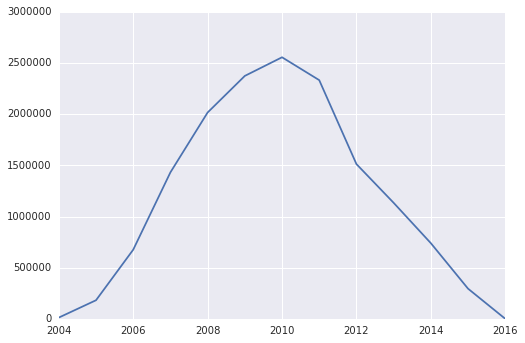

In [252]:
plt.plot(pdDataYear['review_count'])  

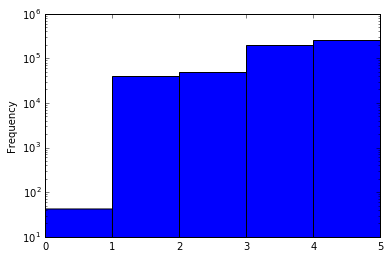

In [46]:
pdData['average_stars'].plot.hist(bins=5, log =True)

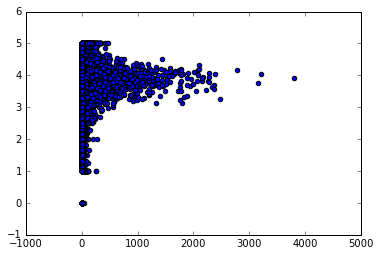

In [44]:
plt.scatter(pdData['friends_count'], pdData['average_stars'])

In [111]:
ix = (pdData[pdData['user_id']=='VhI6xyylcAxi0wOy2HOX3w']['friends']).index
print(ix)

Int64Index([161097], dtype='int64')


In [85]:
IDs  = list(uniqueUsersIDs)

In [92]:
len(IDs)

552339

In [105]:
print(pdData.loc[110,'friends'])

['hDLcXbaavWLO78YedYN_CA', 'AzTPtN_WvmvRXtR_DIX_Ww', 'o7pSN6b_zcqVswzqlA--tw', '6PpC43sX-2JIYs1Zdvq_rQ']


In [125]:
int(pdData[pdData['user_id'] == 'AzTPtN_WvmvRXtR_DIX_Ww']['friends_count']) >0 

True

In [136]:
(pdData[pdData['friends_count'] >0]).describe()

,average_stars,fans,review_count,friends_count
count,249440.000000,249440.000000,249440.000000,249440.000000
mean,3.853881,2.756915,50.722318,14.287271
std,0.834918,15.833263,125.290792,55.946149
min,0.000000,0.000000,0.000000,1.000000
25%,3.500000,0.000000,4.000000,1.000000
50%,3.910000,0.000000,12.000000,3.000000
75%,4.380000,2.000000,42.000000,10.000000
max,5.000000,1657.000000,10320.000000,3812.000000


In [138]:
(pdData[pdData['friends_count'] >0]["friends_count"]).describe()

count    249440.000000
mean         14.287271
std          55.946149
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        3812.000000
Name: friends_count, dtype: float64

In [153]:
largestCC = set() 
maxDegreeUser = pdData['friends_count'].argmax() 
print(maxDegreeUser)

133760


In [194]:
import queue 

q = queue.Queue()
q.put(maxDegreeUser) # (pdData[maxDegreeUser]['user_id'])

largestCC = {maxDegreeUser}

while not q.empty() : 
    item = q.get()
    friendList = pdData.loc[item,'friends']
    for friend in friendList: 
        friendRow = (pdData[pdData['user_id'] == friend].index)[0] 
        #print(friendRow)
        if friendRow not in largestCC: 
            largestCC.add(friendRow)
            q.put(friendRow)
         

In [195]:
print(len(largestCC))

3813
